# Xinyu Zhang 3056684     x.zhang16@students.uu.nl
# Huaixi Tang 2631695     h.tang1@students.uu.nl


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Lab 1: Text Corpora and Language Modelling

Welcome to the first lab assignment of INFOMNLP 2021. 

This lab is meant to help you get familiar with some language data, and use this data to estimate simple models called N-gram language models.

First you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper 
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code. The Penn Treebank may be the most widely used corpus in NLP.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this for some tasks.

The datasets are on Blackboard. Download them and make sure to put the files in the same directory as the notebook.

### Rules
* The lab exercises should be made in **groups of two people**.

* The assignment should submitted to **Blackboard** as `.ipynb`. Only **one submission per group**.

* The **filename** should be `lab1_id1_id2.ipynb`.
 
* The questions marked **Extra** or **Optional** are an additional challenge for those interested in going the extra mile. 

* We may not grade all sub-questions (instead, we may choose a sub-set and scale the points). However, solve them as if they were.

Notes on implementation:

* You should **write your code and answers in this iPython Notebook**. (See http://ipython.org/notebook.html for reference material.) If you have problems, please contact your teaching assistant.

* Use only **one cell for code** and **one cell for markdown** answers!    

    * Put all code in the cell with the `# YOUR CODE HERE` comment.
    
    * For theoretical questions, put your solution in the YOUR ANSWER HERE cell.
    
* Test your code and **make sure we can run your notebook**

# 1. Penn treebank

## Exercise 1.1 
(40 points, 5 points per subquestion )

You are provided with a corpus containing words with their Part-of-Speech tags (POS-tags for short). The format is
**word|POS** (one sentence per line) and the file name is **sec02-22.gold.tagged**. This data is extracted from Sections 02-22 from the Penn Treebank: these sections are most commonly used for training statistical models like POS-taggers and parsers.

The questions below are about both the words in the corpus and POS tags. POS-tagging will be covered in week2 in the course, but you can already start to get familiar with the tags in English.

**[Hint]** **Figure 8.2** in chapter 8 of Jurafsky and Martin (see (https://web.stanford.edu/~jurafsky/slp3/8.pdf)) holds a summary of the 45 POS-tags used in the Penn Treebank tagset together with their meaning and some examples. (If you are keen on learning more about the word-classes represented POS-tags and their definitions you can do a litle reading ahead for next week and already have a look at section 8.1 of the same chapter).

**[Hint]** the Python library [collections](https://docs.python.org/2/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

**(a)** How large is the corpus? (i.e. how **many tokens**). And what is the size of the **vocabulary** used in this corpus? 

Estimate the vocabulary size both by **lowercasing** all the words as well as by leaving the words in their **original orthography**. What is an advantage of lowercasing all the words in your corpus? What is a notable downside? **Give examples.**

In [ ]:
## YOUR CODE HERE ##
from collections import Counter

#the path might need to be changed
sentences_and_pos = open('/sec02-21.gold.tagged').read()
sentences_and_pos = sentences_and_pos.split()
words = []
words_lower = []
postags = []
for token in sentences_and_pos:
    wordandpos = token.split('|')
    words.append(wordandpos[0])
    words_lower.append(wordandpos[0].lower())
    postags.append(wordandpos[1])
    
print("length of corpus:",len(words))
original_count = Counter(words)
lower_count = Counter(words_lower)
postags_count = Counter(postags)
print("size of original vocabulary:",len(original_count))
print("size of lower vocabulary:",len(lower_count))


length of corpus: 929552
size of original vocabulary: 44210
size of lower vocabulary: 39384


YOUR ANSWER HERE

length of corpus: 929552
size of original vocabulary: 44210
size of lower vocabulary: 39384
    
What is an advantage of lowercasing all the words in your corpus? 
A: Same words that appear both in the beginning and middle of sentences can be regard as the same. e.g. "The" and "the"
What is a notable downside? 
A: Some proper nouns, which are in capital, share the same orthography with another normal word. Or other cases when capitalization matters. e.g. "Python" (a programming language) and "python" (a huge snake)

------
For the rest of this exercise you should use the **original orthography** of the data when answering the questions.

------


**(b)** Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**?

[(',', 48310), ('the', 40839), ('.', 38798), ('of', 22782), ('to', 22056), ('a', 19171), ('and', 15906), ('in', 15085), ("'s", 9249), ('that', 7951)]


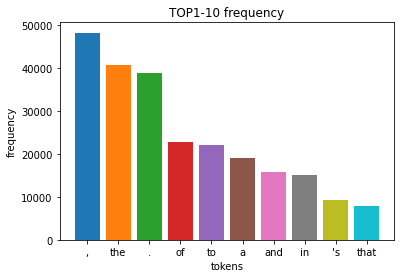

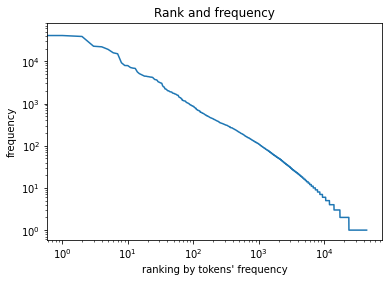

In [ ]:
## YOUR CODE HERE ##
# original_count.pop(',')
# original_count.pop('.')#  ', . $ : ; #'
import math

most_10=original_count.most_common(10)
print(most_10)

for item in most_10:
    plt.bar(item[0],item[1])
    
plt.title('TOP1-10 frequency')  
plt.xlabel('tokens')                                   
plt.ylabel('frequency')                                   
# plt.legend('')                             
plt.show()  

original_rank=original_count.most_common(len(original_count))
x=range(len(original_count))
y=[]
for item in original_rank:
    y.append(item[1])

plt.loglog(x,y)  
plt.title('Rank and frequency')  
plt.xlabel('ranking by tokens\' frequency')                                   
plt.ylabel('frequency')                                            
plt.show()  

As the plot "Rank and frequency" shows, the relationship between the frequency ranking and frequency of the vocabulary is approximate to logarithmic relationship, so the corpus obeys Zipf’s law.

**(c)** What are the **20 most common words** in the corpus and how often do they occur? What is the 50th most common word, the 100th and the 1000th and how often do they occur?

In [ ]:
## YOUR CODE HERE ##
# the 20 most common words in the corpus and how often do they occur
print("the 20 most common words:\n",original_count.most_common(20))
#the 50th most common word
most_1000=original_count.most_common(1000)
print("50th most common word",most_1000[49])
print("100th most common word",most_1000[99])
print("1000th most common word",most_1000[999])

the 20 most common words:
 [(',', 48310), ('the', 40839), ('.', 38798), ('of', 22782), ('to', 22056), ('a', 19171), ('and', 15906), ('in', 15085), ("'s", 9249), ('that', 7951), ('for', 7912), ('$', 7125), ('is', 6893), ('The', 6791), ('said', 5597), ('on', 5112), ('%', 4871), ('it', 4639), ('by', 4450), ('from', 4437)]
50th most common word ('had', 1755)
100th most common word ('A', 860)
1000th most common word ('man', 109)


**(d)** How many different Part-of-speech tags are present in the corpus?

In [ ]:
## YOUR CODE HERE ##
print("number of Part-of-speech tags:\n",len(postags_count))
#print(postags_count)
pos_rank=postags_count.most_common(len(postags_count))
print(pos_rank)

number of Part-of-speech tags:
 48
[('NN', 132134), ('IN', 99413), ('NNP', 90711), ('DT', 82147), ('JJ', 59643), ('NNS', 59332), (',', 48314), ('.', 39252), ('CD', 36148), ('RB', 30232), ('VBD', 29978), ('VB', 26335), ('CC', 24038), ('TO', 21835), ('VBZ', 21810), ('VBN', 19720), ('PRP', 17354), ('VBG', 14910), ('VBP', 12480), ('MD', 9734), ('POS', 8640), ('PRP$', 8351), ('$', 7313), ('WDT', 4261), ('JJR', 3258), ('RP', 2650), ('NNPS', 2642), ('WP', 2351), ('WRB', 2127), (':', 2108), ('JJS', 1931), ('RBR', 1724), ('RRB', 1364), ('LRB', 1352), (';', 1096), ('EX', 875), ('RBS', 448), ('PDT', 367), ('SO', 262), ('FW', 233), ('WP$', 168), ('AS', 166), ('#', 142), ('UH', 97), ('SYM', 59), ('LS', 36), ('NP', 10), ('SBAR', 1)]


**(e)** Print a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, what are the **3 most common words** that belong to that class?

In [ ]:
## YOUR CODE HERE ##
def common_words(tag):
    tag_words_list = []
    for i in range(len(postags)):
        if postags[i]==tag:
            tag_words_list.append(words[i])
            
    tag_words_count = Counter(tag_words_list)
    tag_words_rank = tag_words_count.most_common(3)
    rank1=tag_words_rank[0]
    rank2=tag_words_rank[1]
    rank3=tag_words_rank[2]
    return (rank1[0],rank2[0],rank3[0])

for k in range(10):
    print(k+1, "th common postag:\n", pos_rank[k])
    tag = pos_rank[k][0]
    print("the 3 most common words that belong to the tag:\n",common_words(tag),"\n")

1 th common postag:
 ('NN', 132134)
the 3 most common words that belong to the tag:
 ('%', 'company', 'year') 

2 th common postag:
 ('IN', 99413)
the 3 most common words that belong to the tag:
 ('of', 'in', 'for') 

3 th common postag:
 ('NNP', 90711)
the 3 most common words that belong to the tag:
 ('Mr.', 'U.S.', 'Corp.') 

4 th common postag:
 ('DT', 82147)
the 3 most common words that belong to the tag:
 ('the', 'a', 'The') 

5 th common postag:
 ('JJ', 59643)
the 3 most common words that belong to the tag:
 ('new', 'other', 'last') 

6 th common postag:
 ('NNS', 59332)
the 3 most common words that belong to the tag:
 ('years', 'shares', 'sales') 

7 th common postag:
 (',', 48314)
the 3 most common words that belong to the tag:
 (',', 'an', '2') 

8 th common postag:
 ('.', 39252)
the 3 most common words that belong to the tag:
 ('.', '?', '!') 

9 th common postag:
 ('CD', 36148)
the 3 most common words that belong to the tag:
 ('million', 'billion', 'one') 

10 th common posta

**(f)** A single word may have several POS-tags. For example, *record* can be a both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This make POS-tags extremely useful for **disambiguation**.

What percentage of the words in the vocabulary is **ambiguous**? (i.e. have more than one POS tag?) What are the 10 most frequent combinations of POS tags in the case of ambitguity? Which words are **most ambiguous**? Give some of them.

In [ ]:
## YOUR CODE HERE ##
def tagToNum():
    dic={}
    for i in range(len(pos_rank)):
        dic[pos_rank[i][0]]=i
    return dic

def numToTag():
    dic={}
    for i in range(len(pos_rank)):
        dic[i]=pos_rank[i][0]
    return dic

tag_to_num=tagToNum()
num_to_tag=numToTag()


def setToKey(com_set):
    nums=[]
    for tag in com_set:
        num=tag_to_num[tag]
        nums.append(num)
    nums.sort()
    new_key=""
    for num in nums:
        new_key+=str(num)+"+"
    return new_key

def keyToSet(key):
    com_set=[]
    coms=key.split('+')
    for item in coms:
        if item=='':
            continue
        num=int(item)
        com_set.append(num_to_tag[num])
    return com_set

words_to_tags = {}
for i in range(len(words)):
    word=words[i]
    if words_to_tags.get(word)==None:
        words_to_tags[word]=set()
    words_to_tags[word].add(postags[i])
    
num_ambiguous_voc=0
max_len=1
keys=[]
ambiguous_words=[]
combinations={}

for key,value in words_to_tags.items():
    if len(value)>1:
        num_ambiguous_voc+=1
        ambiguous_words.append(key)
        
        com_key=setToKey(value)
        if combinations.get(com_key)==None:
            combinations[com_key]=1
        else:
            combinations[com_key]+=1
        if len(value)>max_len:
            max_len=len(value)
            keys.append(key)

combinations_sorted=sorted(combinations.items(),key=lambda x:x[1],reverse=True)    

#print
print("percentage of ambiguous words in the vocabulary:",num_ambiguous_voc/len(words_to_tags),"\n")

print("10 most frequent combinations of POS-tags:")
for i in range(10):
    com_set=keyToSet(combinations_sorted[i][0])
    print("#",i+1,":",com_set)

print("\n count of pos-tags of most ambiguous words:", max_len)
print("most ambiguous words:")
for key in keys:
#     if len(words_to_tags[key])<max_len:
#         keys.remove(key)
    print("word:",key," combination of pos-tags:",words_to_tags[key])

percentage of ambiguous words in the vocabulary: 0.13469803211943 

10 most frequent combinations of POS-tags:
# 1 : ['VBD', 'VBN']
# 2 : ['NN', 'JJ']
# 3 : ['NN', 'NNP']
# 4 : ['VB', 'VBP']
# 5 : ['NNS', 'VBZ']
# 6 : ['NN', 'VB']
# 7 : ['NN', 'VBG']
# 8 : ['JJ', 'VBD', 'VBN']
# 9 : ['NN', 'VB', 'VBP']
# 10 : ['NNP', 'JJ']

 count of pos-tags of most ambiguous words: 7
most ambiguous words:
word: In  combination of pos-tags: {'RBR', 'IN', 'RB', 'NNP'}
word: 's  combination of pos-tags: {'PRP', 'VBZ', 'POS', 'NNP', 'NNS'}
word: in  combination of pos-tags: {'CC', 'RBR', 'IN', 'RP', 'RB', 'FW'}
word: set  combination of pos-tags: {'VBP', 'VBN', 'JJ', 'VB', 'VBZ', 'NN', 'VBD'}


**(g)**  Print some of these words with their multiple POS-tags. Do you **understand the ambiguity**? Use figure 10.2 mentioned above to interpret the POS-tags.

In [ ]:
## YOUR CODE HERE ##
print("some ambiguous words:")

for i in range(30):
    key=ambiguous_words[i]
    print("word:",key," combination of pos-tags:",words_to_tags[key])

some ambiguous words:
word: In  combination of pos-tags: {'RBR', 'IN', 'RB', 'NNP'}
word: an  combination of pos-tags: {',', 'DT'}
word: Oct.  combination of pos-tags: {'NNP', 'NN'}
word: review  combination of pos-tags: {'VB', 'VBP', 'NN'}
word: of  combination of pos-tags: {'IN', 'RP', 'RB'}
word: The  combination of pos-tags: {'VB', 'NNP', 'DT'}
word: at  combination of pos-tags: {'IN', 'RP'}
word: 's  combination of pos-tags: {'PRP', 'VBZ', 'POS', 'NNP', 'NNS'}
word: Take  combination of pos-tags: {'VB', 'VBP'}
word: the  combination of pos-tags: {'NN', 'NNP', 'JJ', 'DT'}
word: Stage  combination of pos-tags: {'NN', 'NNP'}
word: in  combination of pos-tags: {'CC', 'RBR', 'IN', 'RP', 'RB', 'FW'}
word: City  combination of pos-tags: {'NNP', 'NN'}
word: Leisure  combination of pos-tags: {'NN', 'NNP'}
word: &  combination of pos-tags: {'SYM', 'CC'}
word: Arts  combination of pos-tags: {'NNPS', 'NNP', 'NNS'}
word: played  combination of pos-tags: {'VBD', 'VBN'}
word: by  combination of 

Ambiguity refers to the inaccuracy of natural words, which have multiple meanings and are difficult to determine.

Example 1:
 "plays": {'VBZ', 'NNS'}

'VBZ' means 3rd person singular present Verb, e.g. "he plays basketball";

'NNS' means plural Noun, e.g. "he went to the theater to see some plays".

Example 2: 
 "&":{'SYM', 'CC'}

'SYN' means a symbol e.g. a math operator.

'NNS' means a coord. conj., representing "and"




**(h)** Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occuring words of the English language. What **percentage of the dataset is ambiguous**?

In [ ]:
## YOUR CODE HERE ##
freq_ambiguous=0
for word in ambiguous_words:
    freq_ambiguous+=original_count[word]

print("frequency of the ambiguous words:",freq_ambiguous/len(words))

## Exercise 1.2 
(10 points, 5 per subquestion)

You are also provided with another file called **sec00.gold.tagged**. 
Section 00 of the Penn Treebank is typically used as development data.

**(a)** How many **unseen words** are present in the development data (i.e., words that have not occurred in the training data)?

In [ ]:
## YOUR CODE HERE ##
sentences_and_pos00 = open('sec00.gold.tagged').read()
sentences_and_pos00 = sentences_and_pos00.split()
words00 = []
postags00 = []
for token in sentences_and_pos00:
    wordandpos = token.split('|')
    words00.append(wordandpos[0])
    postags00.append(wordandpos[1])
    
print("length of corpus:",len(words00))
original_count00 = Counter(words00)
postags_count00 = Counter(postags00)
print("size of original vocabulary:",len(original_count00))

num_unseen=0
unseen=[]
for key, val in original_count00.items():
    if original_count.get(key)==None:
        num_unseen+=1
        unseen.append(key)

print("Number of unseen words:",num_unseen)

**(b)** What are the three **POS tag categories** that the most **unseen words** belong to?

In [ ]:
## YOUR CODE HERE ##
words_to_tags00 = {}
for i in range(len(words00)):
    word=words00[i]
    if words_to_tags00.get(word)==None:
        words_to_tags00[word]=set()
    words_to_tags00[word].add(postags00[i])
    
unseen_tags_list=[]
# unseen_freq={}
for word in unseen:
    tag_set=words_to_tags00[word]
#     freq=original_count00[word]
#     unseen_freq[word]=freq
    for item in tag_set:
        unseen_tags_list.append(item)
        
count_unseen_tags=Counter(unseen_tags_list)
print("the three POS-tags of the most unseen words:",count_unseen_tags.most_common(3))

# 2. Language Models



Reference **chapter 3** of JM3 *Language Modeling with N-Grams*. 

----------

Models that assign **probabilities** to **sequences of words** are called language **language
modelels** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method (https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$


## Exercise 2.1 
(25 points, 15 and 10 for a and b)

**(a) ** Complete the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3,4$. 

**(b) ** Extend the function above so that it accepts a parameter `k` for optional add-$k$ smoothing. 

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

**[Python hint]** The `collections` library has another useful datastructure: the `defaultdict`. Some example uses:

In [66]:
# from collections import defaultdict,Counter

# d = defaultdict(float)
# d["new key"]

Compare that to an ordinary dictionary:

In [67]:
# d = dict()
# d["new key"]

Other datatypes as `default_factory`:

In [ ]:
# d = defaultdict(int)
# d["new key"]

In [ ]:
# d = defaultdict(list)
# d["new key"]

Converting an already existing `dict`:

In [ ]:
# d1 = {k: "value" for k in range(1, 11)}
# d = defaultdict(float, d1) # convert it to a defaultdict
# print(d[5])
# print(d[100])

This doesn't work:

In [ ]:
# d = defaultdict(10)

Use a `lambda` to make the number `10` `callable`":

In [ ]:
# d = defaultdict(lambda: 10)
# d["new key"]

In [ ]:
# d = defaultdict(lambda: defaultdict(float))
# d["new key"]

Clever use of a `defaultdict` can be the solution to the problem of data-storing in a smoothing $N$-gram pointed out above:
    
    ngram = defaultdict(lambda: k/(N+kV), ngram)

The following function is given:

In [ ]:
train_file = "/content/drive/MyDrive/Colab Notebooks/nlp-lab1/ted-train.txt"

def read(fname, max_lines=np.inf):
    """
    Reads in the data in fname and returns it as
    one long list of words. Also returns a vocabulary in
    the form of a word2index and index2word dictionary.
    """
    data = []
    # w2i will automatically keep a counter to asign to new words
    w2i = defaultdict(lambda: len(w2i))
    i2w = dict()
    start = "<s>"
    end = "</s>"
    
    with open(fname, "r", encoding='utf-8') as fh:
        for k, line in enumerate(fh):
            if k > max_lines:
                break
            words = line.strip().split()
            # assign an index to each word
            for w in words:
                i2w[w2i[w]] = w # trick
            
            sent = [start] + words + [end]
            data.append(sent)

    return data, w2i, i2w
data, w2i, i2w = read(train_file)

In [ ]:
def train_ngram(data, N, k=0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionaly returns the unigram model
    
    :param data: text-data as returned by read
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """
    words = [word for sentence in data for word in sentence]
    words_c = len(words)
    unigram = Counter(words)

    v=len(unigram)

    for key, value in unigram.items():
      unigram[key] = (value+k)/(words_c+k*v)
    unigram = defaultdict(lambda: k/(words_c+k*v), unigram)


    if k==0:
      ngram_model = defaultdict(lambda: defaultdict(float)) # ngram[history][word] = #(history,word)
    else:
      ngram_model = defaultdict(lambda: defaultdict(lambda: 1/v))

    ngram = []
    history = []
    for sentence in data:
      if len(sentence)>=N:
          gram = [tuple(sentence[i:i+N]) for i in range(len(sentence)-N)]
          his = [tuple(sentence[i:i+N-1]) for i in range(len(sentence)-N)]
          ngram+=gram
          history+=his

    ngram = Counter(ngram)
    history = Counter(history)

    for gram, c in ngram.items():
        his = gram[0:N-1]
        word = gram[N-1]
        his_c = history[his]
        ngram_model[his][word] = (c+k)/(his_c+k*v)
    
    for his, his_c in history.items():
      ngram_model[his] = defaultdict(lambda: k/(his_c+k*v), ngram_model[his])

    return ngram_model, unigram

bigram, unigram = train_ngram(data, N=2, k=0)
trigram, unigram = train_ngram(data, N=3, k=0)
fourthgram, unigram = train_ngram(data, N=4, k=0)
bigram_smoothed, unigram_smoothed = train_ngram(data, N=2, k=0.1)

In [ ]:
bigram[tuple(['.'])]['</s>']

0.0

In [ ]:
bigram[tuple(['<s>'])]['ar']

In [ ]:
bigram_smoothed[tuple(['<s>'])]['ar']

In [ ]:
trigram[tuple(['Valley', 'did'])]['.']

1.0

In [ ]:
fourthgram[tuple(['<s>', 'I', 'have'])]['an']

## Exercise 2.2 (5 points)

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependecies that occur in actual sentences and the better your changes are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training-set.

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a sentence by **sampling** from the language model.

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [ ]:
from random import random

P = [0.2,0.5,0.2,0.1]

def sample(P):
    u = random() # uniformly random number between 0 and 1
    p = 0
    for i, p_i in enumerate(P):
        if p > u: 
            return i # the first i s.t. p1 + ... + pi > u
        p += p_i
        
print(sample(P))

print(Counter([sample(P) for i in range(1000)])) # check to see if the law of large numbers is still true

2
Counter({2: 538, 1: 204, 3: 166, None: 92})


Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, section 4.3)

In [ ]:
def predict(his, lm):
    dic=lm[his]
    next_words=[]
    next_probs=[]
    for key, value in dic.items():
        next_words.append(key)
        next_probs.append(value)
    if len(next_words) == 0:
      return '</s>'
    idx=sample(next_probs)
    if idx==None:
        return next_words[-1]
    else:
        return next_words[idx-1]

In [ ]:
def generate_sent(lm, N):
  ngram = []
  P_ngram = []
  for his, words in lm.items():
    if his[0] == '<s>':
      for word, prob in words.items():
        gram = [w for w in his]
        gram.append(word)
        ngram.append(tuple(gram))
        P_ngram.append(prob)
  begin = ngram[sample(P_ngram)]
  next = ''
  sentence = list(begin)
  i = 1
  while next != '</s>':
    his = tuple(sentence[i:i+N-1])
    next = predict(his, lm)
    sentence.append(next)
    i+=1
  s = ''
  for word in sentence:
    s+=' '
    s+=word
  return s

s = generate_sent(bigram, 2)
s

' <s> Our society to consider for that I am Bill . </s>'

### [Extra]

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

## Excercise 2.3 (5 points)

Let $V$ denote our vocabulary. Recall that for any $w$ in $V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) \geq 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots shows $p(v|word)$ for the `k` words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`. 

**(a)** Use this function to plot the distribution for at least two words `w` and answer the questions
* What is the effect of smoothing on the bigram distribution of frequent words? 
* What is the effect in the case of infrequent words?
* Explain the difference between the two based on the raw counts of `w` 

**(b)** Now experiment with $k$ much smaller than 1 (but greater than 0!) 
* What are the effects?


**[Hint]** Remember that add-1 smoothing turns 
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

What happens when $C(w_{n-1})$ is relatively big (similiar in of size as $ |V| $)? And what if $C(w_{n-1})$ is small? 

In [ ]:
import pandas as pd
import seaborn as sns    

def plot_bigram_dist(word, bigram, smoothbigram, k=30):
    d = bigram[word]
    ds = smoothbigram[word]
    
    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:k]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:k]
    
    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)
    
    # make up for the fact that in the unsmoothed case  probs is generally less than k long
    probs = probs + (0,) * (k-len(probs)) 

    w_data = pd.DataFrame({"w": smooth_ws * 2,
                           "P({}|w)".format(word): probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*k + ["smoothed"]*k})
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xticks(rotation=90)
    g = sns.barplot(ax=ax, x="w", y="P({}|w)".format(word), hue="smoothing",
                    data=w_data, palette="Blues_d")    

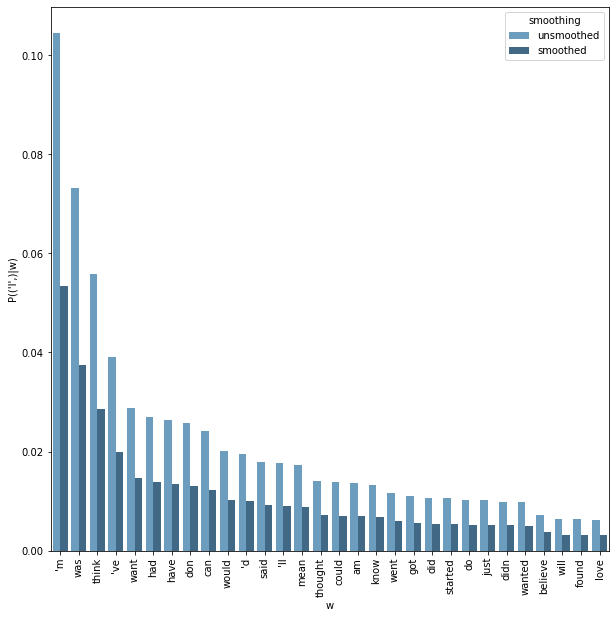

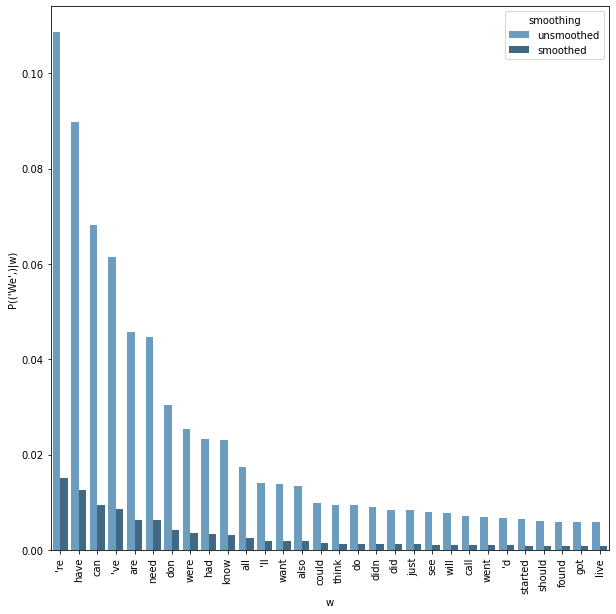

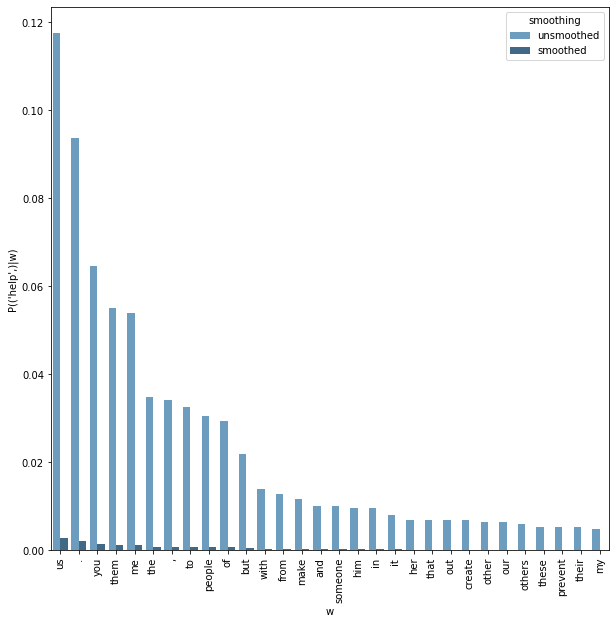

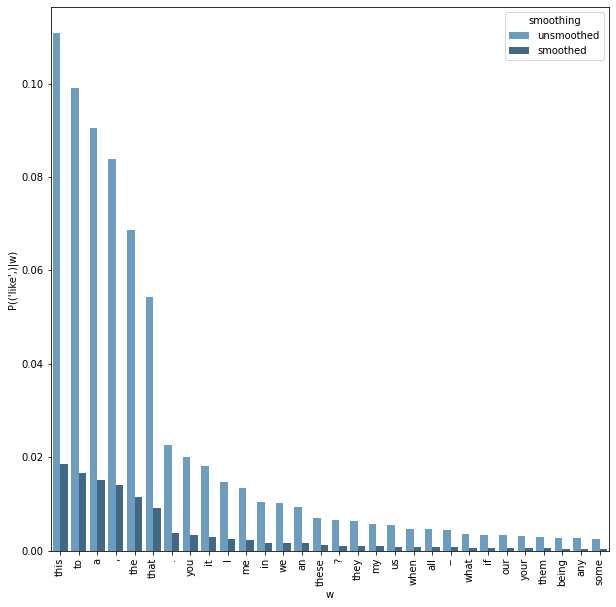

In [ ]:
## YOUR CODE HERE ##
bigram_smoothed_1, unigram_smoothed_1 = train_ngram(data, N=2, k=1)

plot_bigram_dist(tuple(['I']), bigram, bigram_smoothed_1, k=30)
plot_bigram_dist(tuple(['We']), bigram, bigram_smoothed_1, k=30)
plot_bigram_dist(tuple(['help']), bigram, bigram_smoothed_1, k=30)
plot_bigram_dist(tuple(['like']), bigram, bigram_smoothed_1, k=30)

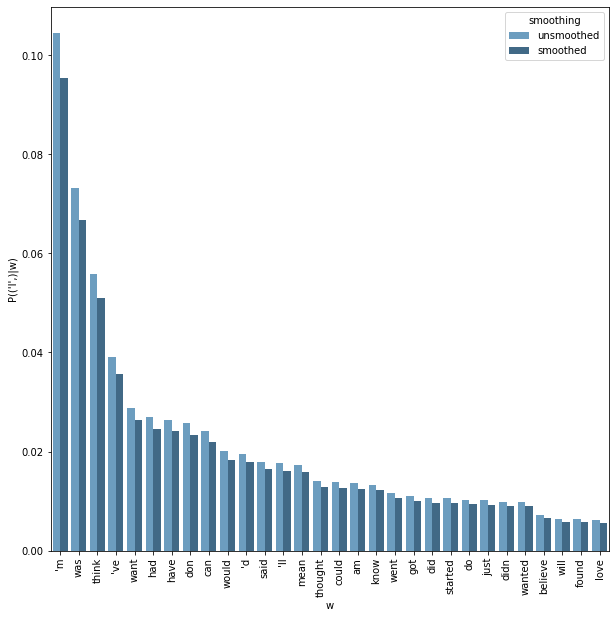

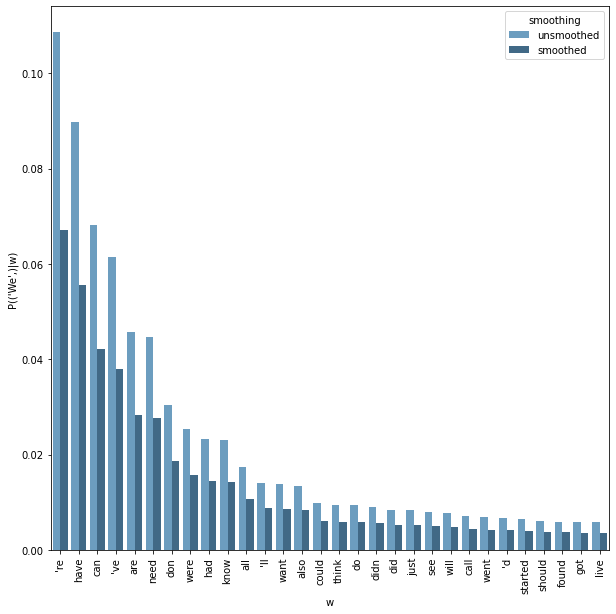

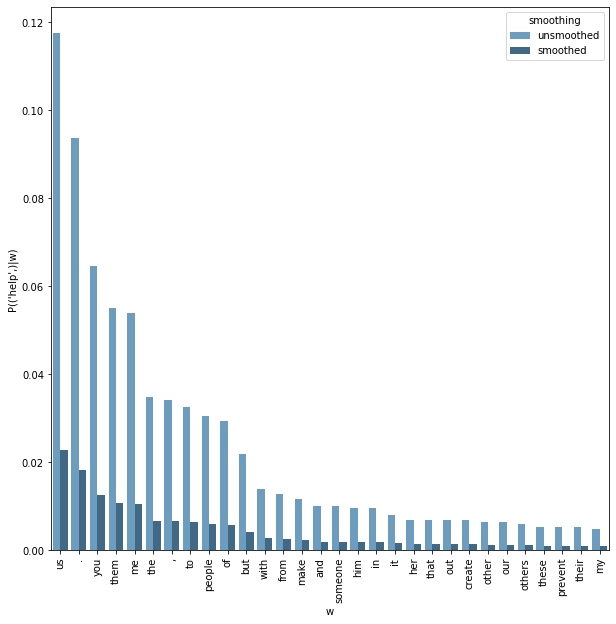

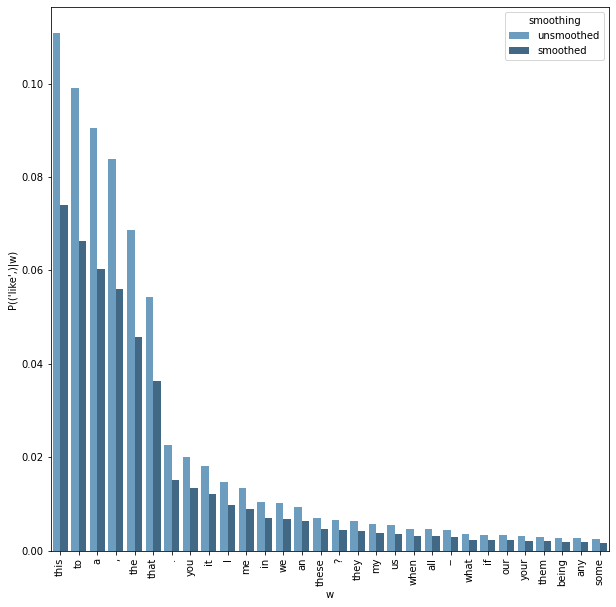

In [ ]:
plot_bigram_dist(tuple(['I']), bigram, bigram_smoothed, k=30)
plot_bigram_dist(tuple(['We']), bigram, bigram_smoothed, k=30)
plot_bigram_dist(tuple(['help']), bigram, bigram_smoothed, k=30)
plot_bigram_dist(tuple(['like']), bigram, bigram_smoothed, k=30)

YOUR ANSWERS HERE

(a) For words that are frequent (e.g. 'I'), smoothing doesn't change the probability a lot. The smoothed bars are just a little bit lower than unsmoothed bars.

For words that are relatively infrequent (e.g. 'help'), smoothing dramatically changes the probability model. The smoothed bars are about 1/6 to 1/5 of the unsmoothed bars.

Exlpain: The more frequent the word is, the C(w_n-1) is bigger, so the " + |V|" item on the denominator will have less effect on the whole value; and the more infrequent the word is, the C(w_n-1) is smaller, so the " + |V|" item will have more effect on the whole value.

(b) Effect of k: When k=1, for both frequent and infrequent words, smoothing will have larger effect than when 0<k<<1. In the plot we can see, for word 'I', the smoothed bars are about half of the unsmoothed bars. That is because when 0<k<<1, the item "+ k|V|" will much smaller than "+ |V|".


**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_i|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_{N-1}|w_1\dots w_{N-2})\prod_{i=N}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

## Exercise 2.4 (5 points)

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought 
       together in a collision , producing a burst of pure energy .

**Repeat** this with the **smoothed (add-1)** versions of the N-grams. What is the effect of smoothing on the probabilities?


In [ ]:
## YOUR CODE HERE ##
s1 = 'Every day was about creating something new .'
s2 = 'In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .'

def get_sent(s):
  start = '<s>'
  end = '</s>'
  words= s.strip().split()
  sent = [start] + words + [end]
  return sent

def get_sent_prob(s, N, ngram):
  sent = get_sent(s)
  if N==1:
    prob = 1
    for word in sent:
      prob *= ngram[word]
    return prob
  else:
    gram = [tuple(sent[i:i+N]) for i in range(len(sent)-N)]
    prob = 0.0
    for his, words in ngram.items():
      if his == tuple(sent[0:N-1]):
        for word, p in words.items():
          prob += p
        break
    for g in gram[1:]:
      prob*=ngram[g[0:N-1]][g[N-1]]
    return prob

In [ ]:
get_sent_prob(s1,1,unigram), get_sent_prob(s2,1,unigram)

(8.711492631550748e-27, 2.7545011290780525e-102)

In [ ]:
get_sent_prob(s1,1,unigram_smoothed_1), get_sent_prob(s2,1,unigram_smoothed_1)

(7.628943757061614e-27, 4.109546393965371e-102)

In [ ]:
get_sent_prob(s1,2,bigram), get_sent_prob(s2,2,bigram)

(3.033151810717665e-14, 1.2225752266818072e-70)

In [ ]:
get_sent_prob(s1,2,bigram_smoothed_1), get_sent_prob(s2,2,bigram_smoothed_1)

(1.181410209022898e-23, 1.2598101450183324e-114)

In [ ]:
get_sent_prob(s1,3,trigram), get_sent_prob(s2,3,trigram)

(8.477868768134693e-08, 4.171894067528797e-28)

In [ ]:
trigram_smoothed_1, _ = train_ngram(data, N=3, k=1)
get_sent_prob(s1,3,trigram_smoothed_1), get_sent_prob(s2,3,trigram_smoothed_1)

(1.570741232720349e-28, 9.238114994057196e-131)

YOUR ANSWERS HERE

For unigram model, the smoothed probabilities can be a little higher or lower;
For bi-gram and tro-gram, the smoothed probability is abviously smaller than the unsmoothed probability. The longer the sentence is and the infrequent the words are, the more dramatic the decrease effect is.

## Exercise 2.5 (5 points)

The above sentences were taken from the training set, hence they will all have probability greater than 0. The big challenge for our language model are of course with sentence that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following three senteces are taken from the **test set** availlable in the file **ted-test.txt**. What probabilities do your smoothed and unsmoothed language models asign in this case?

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every 
       conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible 
       reality .

In [ ]:
### YOUR CODE HERE ###
s1t = 'Because these robots are really safe .'
s2t = 'We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .'

In [ ]:
get_sent_prob(s1t,1,unigram), get_sent_prob(s2t,1,unigram)

(3.5731707008639346e-24, 3.699664748429897e-120)

In [ ]:
get_sent_prob(s1t,1,unigram_smoothed_1), get_sent_prob(s2t,1,unigram_smoothed_1)

(3.1752807875634993e-24, 3.60960523835821e-120)

In [ ]:
get_sent_prob(s1t,2,bigram), get_sent_prob(s2t,2,bigram)

(4.828293435567934e-13, 0.0)

In [ ]:
get_sent_prob(s1t,2,bigram_smoothed_1), get_sent_prob(s2t,2,bigram_smoothed_1)

(1.7386702441698887e-21, 4.3414124072457724e-125)

In [ ]:
get_sent_prob(s1t,3,trigram), get_sent_prob(s2t,3,trigram)

(0.0, 0.0)

In [ ]:
get_sent_prob(s1t,3,trigram_smoothed_1), get_sent_prob(s2t,3,trigram_smoothed_1)

(6.043776817214262e-26, 1.6620193477848932e-155)

YOUR ANSWERS HERE

The unsmoothed probability can be 0 (such as bi-gram for sentence 2 and tri-gram for both sentences), while the smoothed probability is always >0.

The smoothed probability is abviously smaller than the unsmoothed probability. The longer the sentence is and the infrequent the words are, the more dramatic the decrease effect is.

### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models? 

In [ ]:
### ANSWER HERE ###

## Exercise 2.6 (5 points)

**Perplexity** is a frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.
Note: $(x_1\cdots x_n)^{-\frac{1}{n}}$ is the **geometric mean** of the numbers $x_1,\dots,x_n$. It is like the (regular) artithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the training sentences from excercise 2.1. What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?

In [ ]:
### YOUR CODE HERE ###
def get_perplexity(s,N,ngram):
  sent = get_sent(s)
  n = len(sent)
  prob = get_sent_prob(s,N,ngram)
  return pow(prob,(-1/n))


get_sent_prob(s1,2,bigram), get_perplexity(s1,2,bigram)

(3.033151810717665e-14, 22.480739089848097)

In [ ]:
get_sent_prob(s2,2,bigram), get_perplexity(s2,2,bigram)

(1.2225752266818072e-70, 113.82996446003379)

YOUR ANSWER HERE

The PP is not related to the length of the sentence.

The larger the Probability is, the smaller the PP is.

# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook. 

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge. 

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will asign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to asign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is so-called **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best performing N-gram smoothing methods, and up to a few years ago a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state of the art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization. 

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving  vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vectors $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transforamtion. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: 
https://www.maths.ed.ac.uk/~v1ranick/papers/wigner.pdf



Acknowledgements: Most of this lab was developed in collaboration with Joost Bastings and Dan Douwe.